# Module 9 Challenge

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
plt.style.use('fivethirtyeight')
pd.set_option('precision', 2)

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
june_temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date.like('%-06-%')).order_by(Measurement.date).all()

In [5]:
#  3. Convert the June temperatures to a list.
temps = [temp for temp in june_temps]

In [59]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(temps, columns=['date', 'tobs'])
june_temps_df.set_index(['date'], inplace=True)
june_temps_df.rename(columns={'tobs': 'june_temps'}, inplace=True)
june_temps_df.tail()

,june_temps
date,
2016-12-31,66.0
2016-12-31,71.0
2016-12-31,72.0
2016-12-31,67.0
2016-12-31,65.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,june_temps
count,1700.00
mean,74.94
std,3.26
min,64.00
25%,73.00
50%,75.00
75%,77.00
max,85.00


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date.like('%-12-%')).order_by(Measurement.date).all()

In [9]:
# 7. Convert the December temperatures to a list.
temps = [temp for temp in december_temps]

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temps_df = pd.DataFrame(temps, columns=['date', 'tobs'])
december_temps_df.set_index(['date'], inplace=True)
december_temps_df.rename(columns={'tobs': 'december_temps'}, inplace=True)
december_temps_df.head()

,december_temps
date,
2010-12-01,76.0
2010-12-01,73.0
2010-12-01,73.0
2010-12-01,72.0
2010-12-01,78.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temps_df.describe()

,december_temps
count,1517.00
mean,71.04
std,3.75
min,56.00
25%,69.00
50%,71.00
75%,74.00
max,83.00


In [12]:
# june
june_summary_df = june_temps_df.describe()
june_summary_df.index.name = "stats"

# december
december_summary_df = december_temps_df.describe()
december_summary_df.index.name = "stats"

# merge
temp_summary_df = pd.merge(june_summary_df, december_summary_df, on="stats")

# display
temp_summary_df.index.name = ''
temp_summary_df

,june_temps,december_temps
,,
count,1700.00,1517.00
mean,74.94,71.04
std,3.26,3.75
min,64.00,56.00
25%,73.00,69.00
50%,75.00,71.00
75%,77.00,74.00
max,85.00,83.00


In [13]:
# export temp_summary as html
temps_html = temp_summary_df.to_html()
with open('temps_summary.html', 'w') as out_file:
    out_file.write(temps_html)

917

In [40]:
june_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.like('%-06-%')).order_by(Measurement.date).all()

In [41]:
june_prcp = [prcp for prcp in june_prcp]

In [42]:
june_prcp_df = pd.DataFrame(june_prcp, columns=['date', 'prcp'])
june_prcp_df.set_index(['date'], inplace=True)
june_prcp_df.rename(columns={'prcp': 'june_prcp'}, inplace=True)
june_prcp_df.head()

,june_prcp
date,
2010-06-01,0.00
2010-06-01,0.03
2010-06-01,0.01
2010-06-01,0.00
2010-06-01,NaN


In [43]:
december_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.like('%-12-%')).order_by(Measurement.date).all()

In [44]:
december_prcp = [prcp for prcp in december_prcp]

In [45]:
december_prcp_df = pd.DataFrame(december_prcp, columns=['date', 'prcp'])
december_prcp_df.set_index(['date'], inplace=True)
december_prcp_df.rename(columns={'prcp': 'december_prcp'}, inplace=True)
december_prcp_df.head()

,december_prcp
date,
2010-12-01,0.04
2010-12-01,0.76
2010-12-01,0.03
2010-12-01,0.70
2010-12-01,0.03


In [53]:
dec_stats = december_prcp_df.agg(['min', 'mean', 'max'])

In [54]:
june_stats = june_prcp_df.agg(['min', 'mean', 'max'])

In [57]:
june_stats.index.name = 'stats'
dec_stats.index.name = 'stats'
prcp_stats = pd.merge(june_stats, dec_stats, on='stats')

In [58]:
prcp_stats.index.name = ''
prcp_stats

,june_prcp,december_prcp
,,
min,0.00,0.00
mean,0.14,0.22
max,4.43,6.42


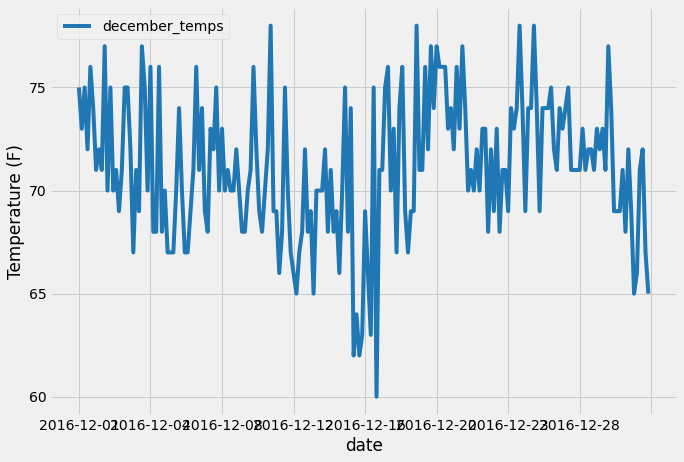

In [60]:
december_2016_df = december_temps_df.loc[december_temps_df.index >= '2016-12-01']
december_2016_df.plot(figsize=(10, 7), color='tab:blue')
plt.ylabel('Temperature (F)')
plt.yticks(np.arange(60, 80, step=5))
plt.show();

In [64]:
june_2016_df = june_temps_df.loc[june_temps_df.index.isin ['2016-06-01', '2016-06-31']
june_2016_df.plot(figsize=(10, 7), color='tab:red')
plt.ylabel('Temperature ($^0$F)')
plt.yticks(np.arange(60, 80, step=5))
plt.show();

SyntaxError: invalid syntax (3803740100.py, line 2)

In [ ]:
june_temps_df